# Name: Ahmad Ossama Ahmad 

# The Sparks Foundation Data Science & Business Analytics Internship

## Task 5 - Exploratory Data Analysis (Sports)

## Goals: 
## - Try to find out the most successful teams, players and factors contributing win or loss of a team as a sports analyst
## - Suggest teams or players a company should endorse for its products

### Importing Required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading and loading Dataset files

In [2]:
url = 'https://bit.ly/34SRn3b'
del_df = pd.read_csv('deliveries.csv')
mat_df = pd.read_csv('matches.csv')

### Deliveries Dataset Description

In [3]:
del_df.shape

(179078, 21)

In [4]:
del_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
del_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

#### The dataframe info shows all coulmns do not contain any null values except player_dismissed, dismissal_kind and fielder columns which contains around 9000 null objects so the three columns' null values will be replaced with the most counted values

In [6]:
del_df['player_dismissed'].value_counts()

SK Raina         162
RG Sharma        155
RV Uthappa       153
V Kohli          143
S Dhawan         137
                ... 
AG Murtaza         1
Younis Khan        1
PSP Handscomb      1
AA Noffke          1
NL McCullum        1
Name: player_dismissed, Length: 487, dtype: int64

In [7]:
#Fill null values with SK Raina
del_df['player_dismissed'].fillna('SK Raina')

0          SK Raina
1          SK Raina
2          SK Raina
3          SK Raina
4          SK Raina
            ...    
179073     SK Raina
179074     SK Raina
179075    SR Watson
179076     SK Raina
179077    SN Thakur
Name: player_dismissed, Length: 179078, dtype: object

In [8]:
del_df['dismissal_kind'].value_counts()

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

In [9]:
#Fill null values with caught
del_df['dismissal_kind'].fillna('caught')

0          caught
1          caught
2          caught
3          caught
4          caught
           ...   
179073     caught
179074     caught
179075    run out
179076     caught
179077        lbw
Name: dismissal_kind, Length: 179078, dtype: object

In [10]:
del_df['fielder'].value_counts()

MS Dhoni               159
KD Karthik             152
RV Uthappa             125
SK Raina               115
AB de Villiers         114
                      ... 
M Kaif (sub)             1
GJ Bailey (sub)          1
R Vinay Kumar (sub)      1
UA Birla                 1
R Bishnoi                1
Name: fielder, Length: 499, dtype: int64

In [11]:
#Fill null values with MS Dhoni
del_df['fielder'].fillna('MS Dhoni')

0          MS Dhoni
1          MS Dhoni
2          MS Dhoni
3          MS Dhoni
4          MS Dhoni
            ...    
179073     MS Dhoni
179074     MS Dhoni
179075    KH Pandya
179076     MS Dhoni
179077     MS Dhoni
Name: fielder, Length: 179078, dtype: object

### Matches Dataset Description

In [12]:
mat_df.shape

(756, 18)

In [13]:
mat_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [14]:
mat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [15]:
#check null values of umpire3 as it has very few amount of non-null objects
mat_df['umpire3'].isnull().sum()

637

### Remove umpire3 column as it has too many null values

In [16]:
mat_df = mat_df.drop(columns= 'umpire3')

In [17]:
mat_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [18]:
mat_df['id'].max()

11415

In [19]:
#Most runs won by a team
mat_df.iloc[mat_df['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object

## Deliveries Visualization

#### Visualize deliveries to observe scores. This bar chart represents batsmen with most number of IPL runs under their belt

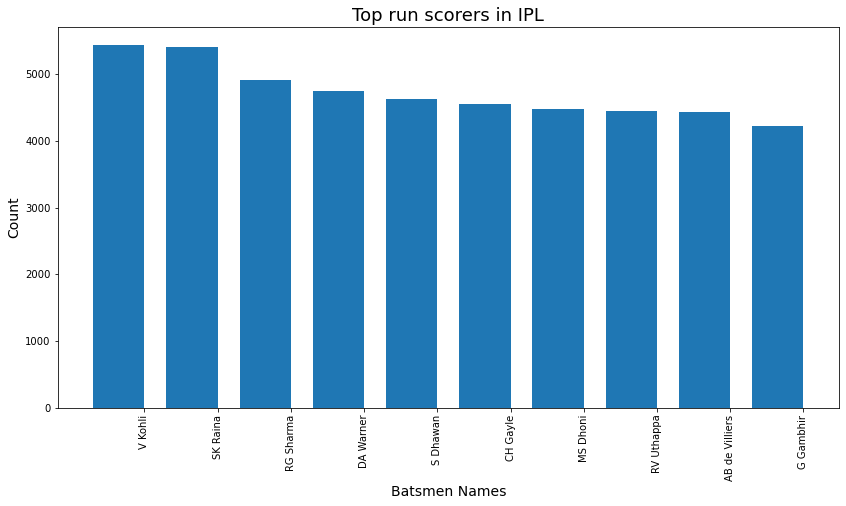

In [20]:
top = del_df.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True).iloc[:10,:]

labels = np.array(top['batsman'])
ind = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(14,7))
rects = ax.bar(ind, np.array(top['batsman_runs']), width= 0.7)
ax.set_xticks(ind+((0.7)/2.))
ax.set_xticklabels(labels, rotation = 'vertical')
ax.set_ylabel("Count", fontsize=14)
ax.set_xlabel('Batsmen Names', fontsize=14)
ax.set_title("Top run scorers in IPL", fontsize=18)
plt.show()

#### As shown above, V Kohli is the top scorer among all players followed by SK Raina.


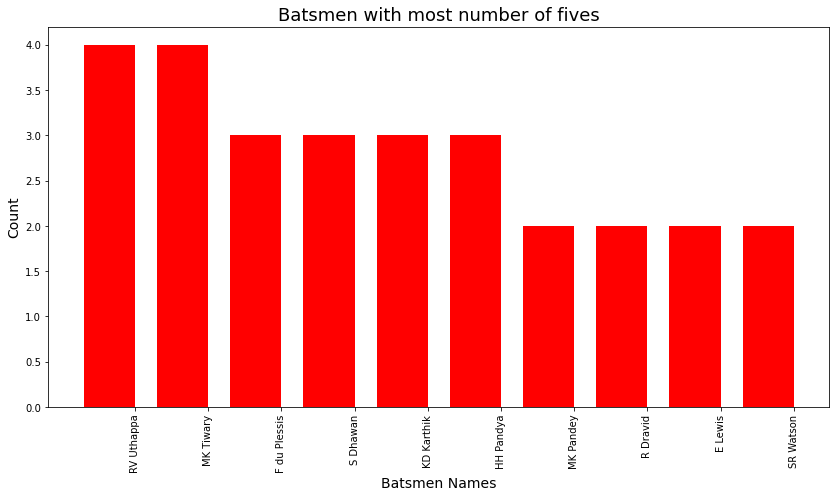

In [21]:
bats = del_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x== 5).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True).iloc[:10,:]

labels = np.array(bats['batsman'])
ind = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(14,7))
rects = ax.bar(ind, np.array(bats['batsman_runs']), width = 0.7, color = 'red')
ax.set_xticks(ind +((0.7)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_xlabel('Batsmen Names', fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.set_title("Batsmen with most number of fives",fontsize=18)
plt.show()

#### RV Uthappa is the highest batsman with most number of fives

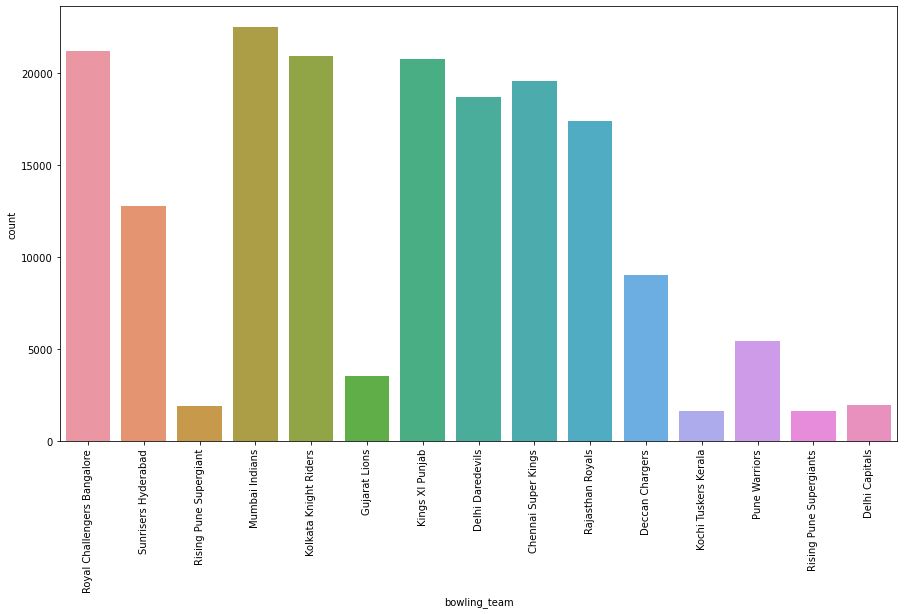

In [22]:
# Now let us see most common dismissal types in IPL.
plt.figure(figsize=(15,8))
sns.countplot(x='bowling_team', data = del_df)
plt.xticks(rotation='vertical')
plt.show()

#### Mumbai Indians has scored the highest among bowling teams

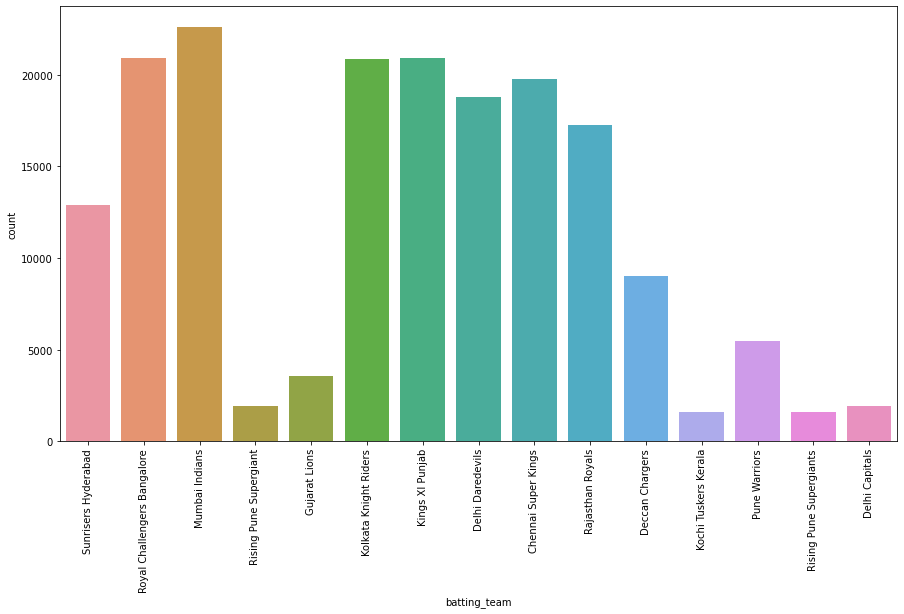

In [23]:
# Now let us see most common dismissal types in IPL.
plt.figure(figsize=(15,8))
sns.countplot(x='batting_team', data = del_df)
plt.xticks(rotation='vertical')
plt.show()

#### #### Mumbai Indians has also scored the highest among batting teams while the lowest is the Rising Pune Superglass

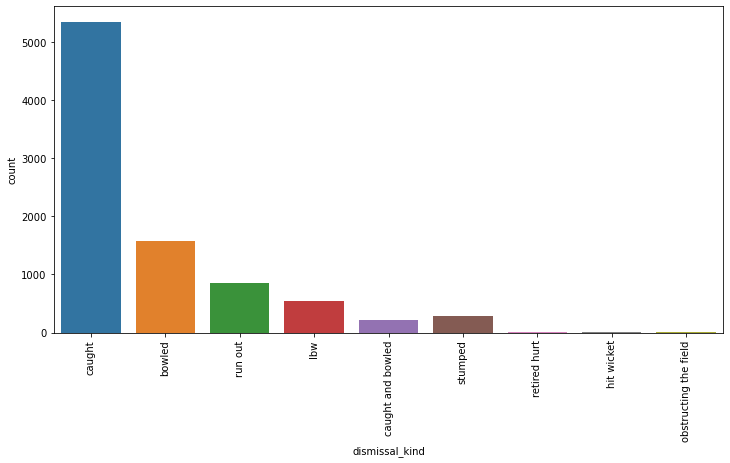

In [24]:
# Most common dismissal kinds in IPL.
plt.figure(figsize=(12,6))
sns.countplot(x='dismissal_kind', data=del_df)
plt.xticks(rotation='vertical')
plt.show()

#### Caught is the most repeated dismissal kind while retired hunt is the lowest

## Matches Visualization

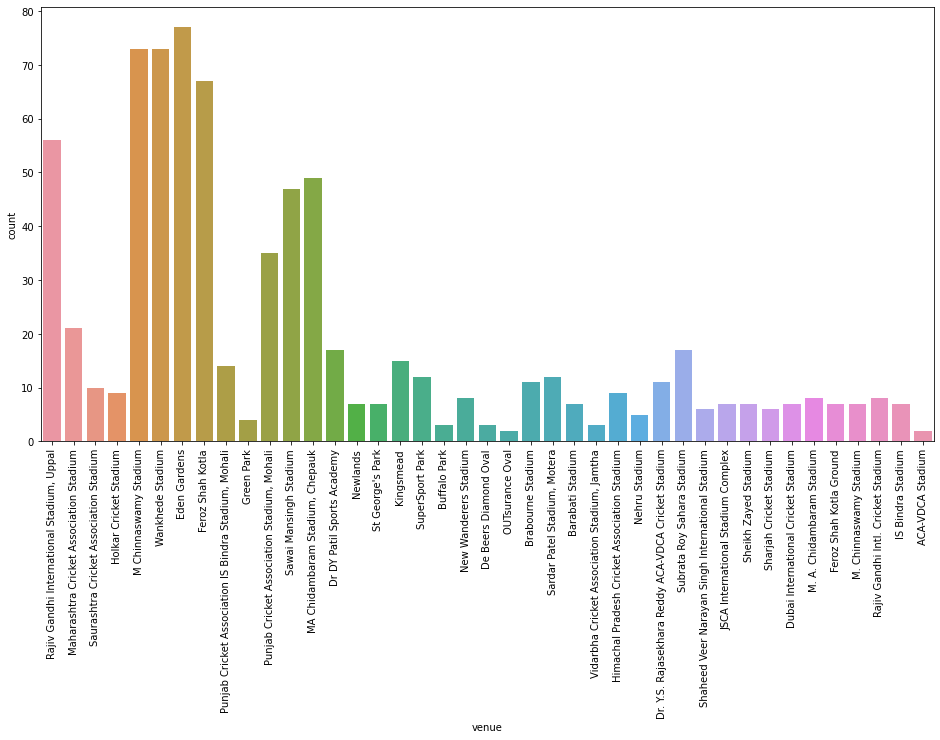

In [25]:
plt.figure(figsize=(16,8))
sns.countplot(x = 'venue', data = mat_df)
plt.xticks(rotation = 'vertical')
plt.show()

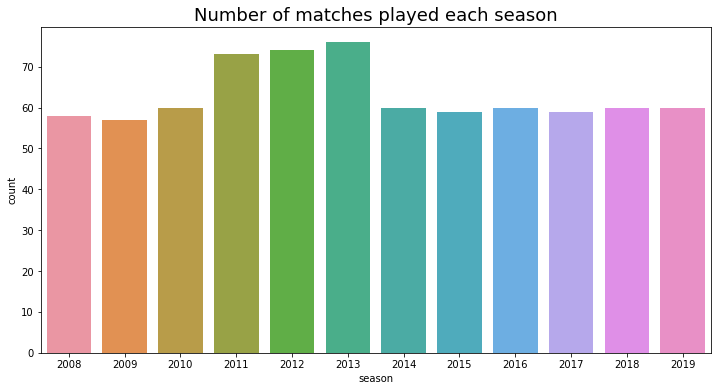

In [26]:
#Count plot of matches according to each season
plt.figure(figsize=(12,6))
sns.countplot(x='season', data=mat_df)
plt.title('Number of matches played each season',fontsize=18)
plt.show()

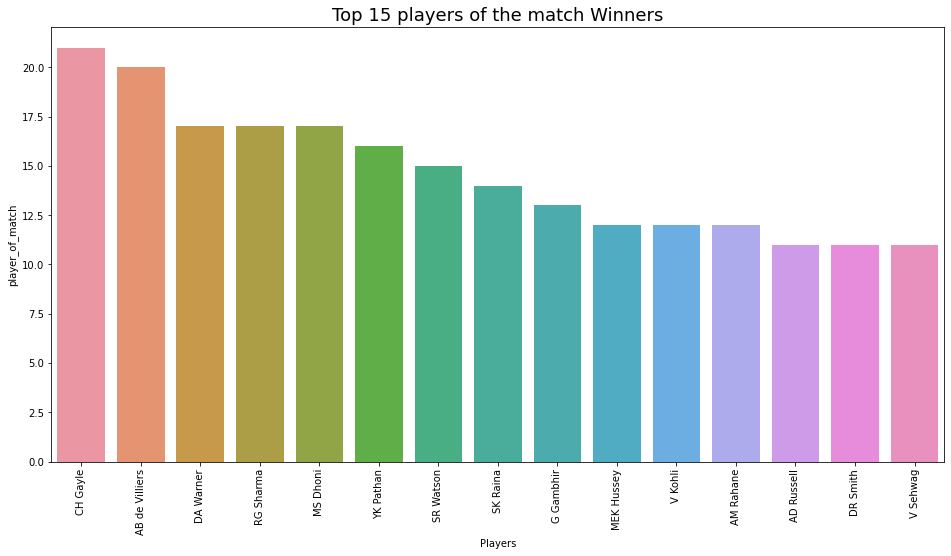

In [27]:
top = mat_df.player_of_match.value_counts()[:15]
fig, ax = plt.subplots(figsize=(16,8))
ax.set_xlabel("Players")
ax.set_title("Top 15 players of the match Winners", fontsize=18)
top.plot.bar()
sns.barplot(x = top.index, y = top);
plt.show()

#### As shown above, CH Gayle is the highest player of all match winners followed by AB de Villiers

### Number of matches played by each team:

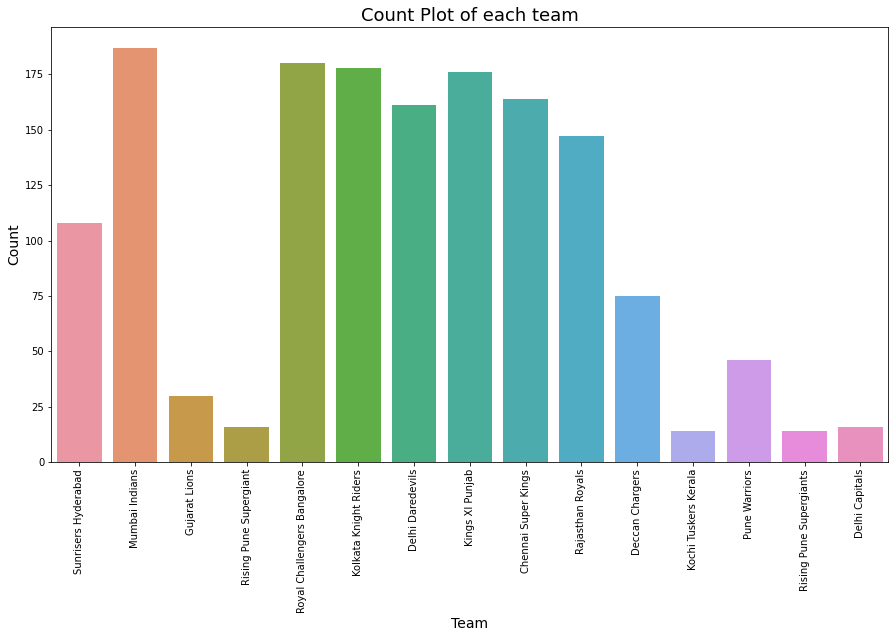

In [28]:
data = pd.melt(mat_df, id_vars = ['id','season'], value_vars=['team1', 'team2'])

plt.figure(figsize=(15,8))
sns.countplot(x = 'value', data = data)
plt.xticks(rotation = 'vertical')
plt.xlabel('Team', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Count Plot of each team', fontsize = 18)
plt.show()

#### Mumbai Indians has played the highest number of matches while Kochi Tuskers Kerala team played the least 

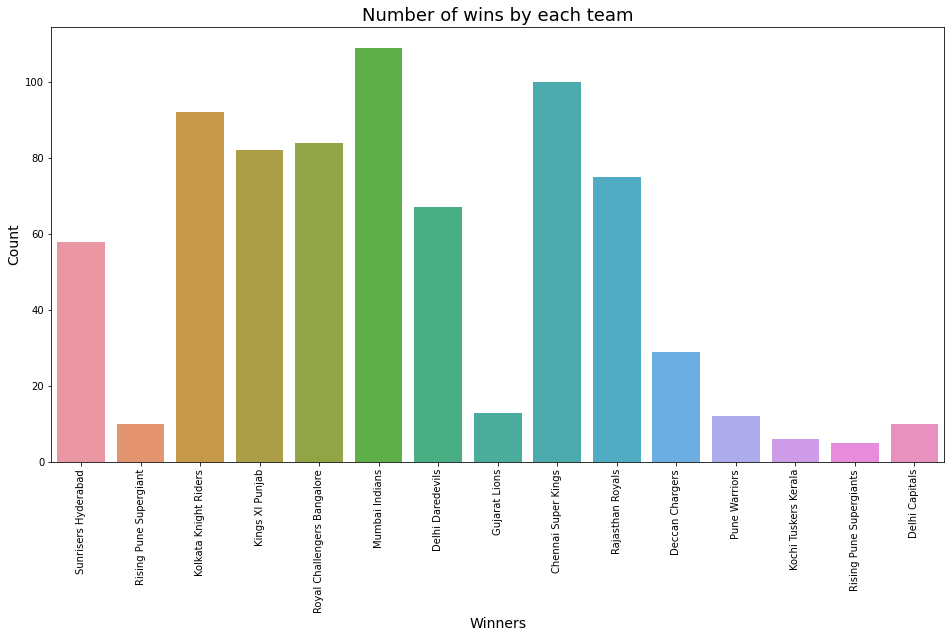

In [29]:
plt.figure(figsize=(16,8)) 
sns.countplot(x = 'winner', data = mat_df)
plt.xticks(rotation = 'vertical')
plt.xlabel('Winners',fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Number of wins by each team',fontsize = 18)
plt.show()

#### As shown from the bar chart, Mumbai Indians has the highest number of wins of all winners. This is normal as they have played the highest number of matches as mentioned above.

### Number of matches hosted by each venue

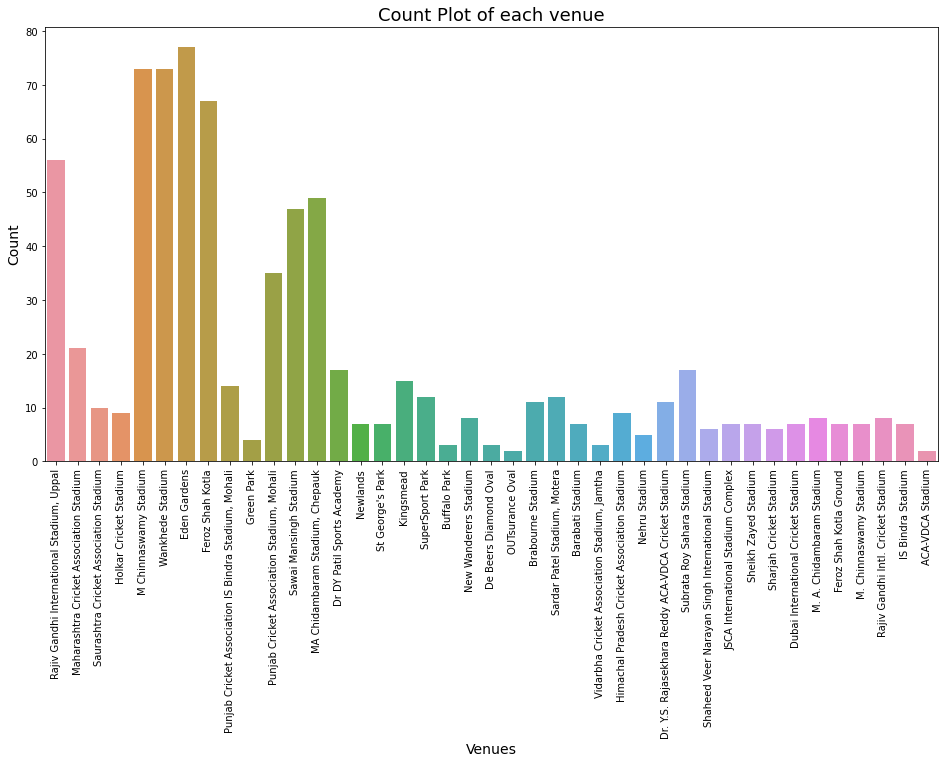

In [30]:
plt.figure(figsize=(16,8))
sns.countplot(x = 'venue', data = mat_df)
plt.xticks(rotation = 'vertical')
plt.xlabel('Venues', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Count Plot of each venue', fontsize = 18)
plt.show()

#### Eden Gardens Venue has hosted highest number of matches followed by Wankhede Stadium

In [31]:
#Toss Decision feature counts
mat_df['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

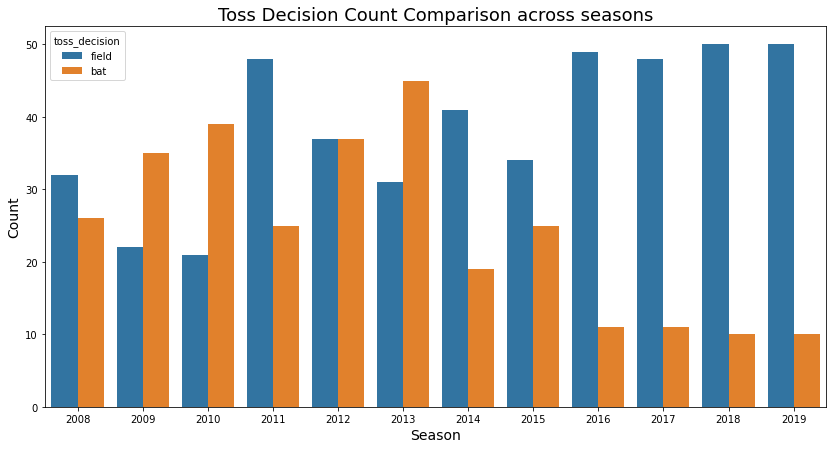

In [32]:
plt.figure(figsize=(14,7))
sns.countplot(x='season', hue='toss_decision', data = mat_df)
plt.xlabel('Season', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Toss Decision Count Comparison across seasons', fontsize = 18)
plt.show()


#### From the bar chart, field's count is higher than bat's in almost every season and the difference between them started to increase greatly from season 2016